In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
data = load_diabetes()
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
X=data.data
y=data.target

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [5]:
from sklearn.linear_model import  LinearRegression
lr = LinearRegression()

In [6]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5188113124539249
RMSE 48.72713760953252


In [7]:
lr.intercept_, lr.coef_

(152.13623331746496,
 array([  23.45465406, -247.42747406,  492.1087518 ,  329.35876431,
        -970.79723039,  573.54295519,  182.42162368,  255.92168168,
         794.21609282,   89.32249214]))

# Ridge Regression

In [8]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.00001)

In [9]:
ridge.fit(X_train,y_train)

Ridge(alpha=1e-05)

In [10]:
y_pred1 = ridge.predict(X_test)
print("R2 score of Ridge",r2_score(y_test,y_pred1))
print("RMSE of Ridge",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score of Ridge 0.5188278514667461
RMSE of Ridge 48.726300198242974


# Alpha Tune

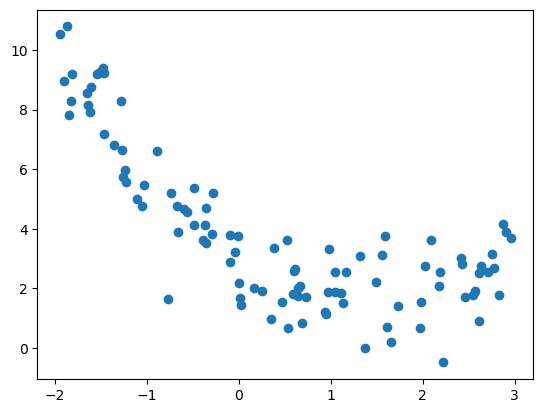

In [11]:
m = 100
x1 = 5 * np.random.rand(m,1) - 2
x2 = (0.7 * x1**2) - (2 * x1) + 3  + np.random.randn(m,1)

plt.scatter(x1,x2)
plt.show()

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  PolynomialFeatures

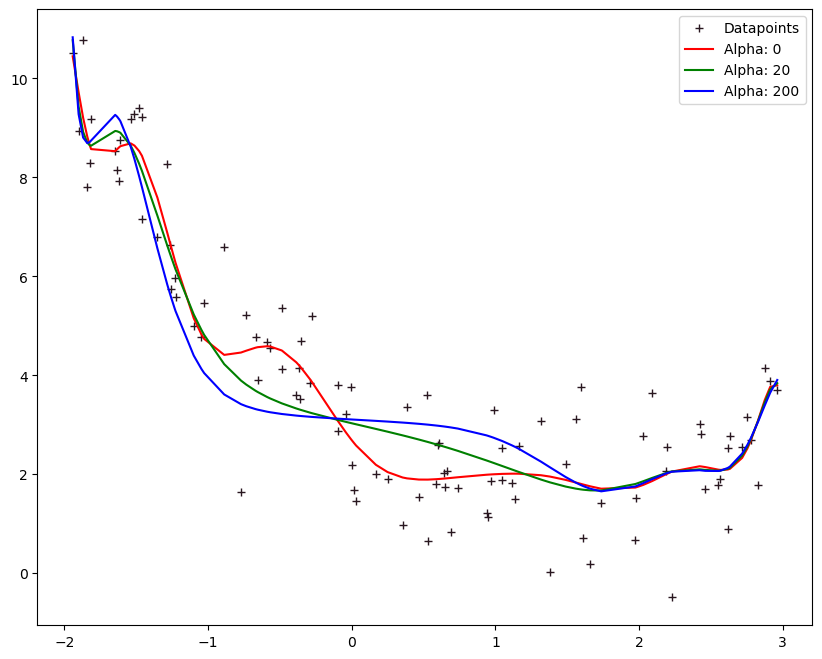

In [19]:
def get_ridges_predict(x1,x2,alpha):
    model = Pipeline([
        ('poly_features',PolynomialFeatures(degree=16)),
        ('ridge',Ridge(alpha=alpha))
    ])
    
    model.fit(x1,x2)
    return model.predict(x1)

alphas = [0,20,200]
cs =['r','g','b']

plt.figure(figsize=(10,8))
plt.plot(x1, x2, '+',color='#291720', label='Datapoints')
for alpha, c in zip(alphas,cs):
    preds = get_ridges_predict(x1,x2, alpha)
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))
plt.legend()
plt.show()